# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to the environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. Training

Let's set up our agent.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
from agent import Agent
agent = Agent(state_size, action_size, 1)

Now we have to train it.

In [ ]:
from collections import deque

def ddpg(n_episodes=300, max_t=1000):
    """DDPG for solving reacher environment.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []                        # List containing scores from each episode
    scores_window = deque(maxlen=100)  # Last 100 scores
    solved = False                     # To keep track whether we already solved the environment

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # Reset the environment to train mode
        state = env_info.vector_observations[0]            # Get initial state
        score = 0                                          # Reset score

        for t in range(max_t): 
            action = agent.act(state)                      # Get action from actor
            action = np.clip(action, agent.action_limits[0], agent.action_limits[1]).numpy() # Clip it to valid range
            env_info = env.step(action)[brain_name]        # Send action to the environment
            next_state = env_info.vector_observations[0]   # Get the next state, ...
            reward = env_info.rewards[0]                   # ..., reward ...
            done = env_info.local_done[0]                  # ..., and whether the episode has finished 
            agent.step(state, action, reward, next_state, done)  # Take one step, learn new weights via soft update
            state = next_state                             # Progress states 
            score += reward                                # Update score

            if done: 
                break
        scores_window.append(score)                        # Save most recent score
        scores.append(score)                               # Save most recent score

        # display some progress
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode% 25 ==0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        if np.mean(scores_window) >= 30 and not solved:    # Only print "solved" if target score reached for the first time
            print("\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}".format
                 (i_episode - 100, np.mean(scores_window)))
            solved = True
            answer = input("Should I continue training? [Y/n]")  # Give the user the possibility to cancel further training
            if answer.lower()=='n':
                break
    return scores

# Train agent and keep track of the scores
if 'scores' in locals():
    # Append if scores already exist, adjust epsilon to final value
    scores += ddpg(n_episodes=300) 
else: 
    # No scores have been generated, so start training all over, again
    scores = ddpg()


Episode 25	Average Score: 0.61
Episode 50	Average Score: 0.63
Episode 75	Average Score: 0.62
Episode 100	Average Score: 1.00
Episode 125	Average Score: 1.46
Episode 150	Average Score: 2.44
Episode 167	Average Score: 3.34

## 5. Visualization of Results

Let us plot the results, namely the scores reached per episode.

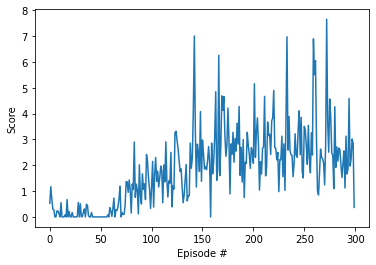

In [4]:
import matplotlib.pyplot as plt

# plot the scores
fig = plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

And with moving average to get a clearer picture of the trend: 

In [ ]:
window = 5
cumsum, moving_aves = [0], []

# Credits to Aikude (accessed 2020-04-08): 
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
for i, x in enumerate(scores, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=window:
        moving_ave = (cumsum[i] - cumsum[i-window])/window
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
        
fig = plt.figure()
plt.plot(np.arange(len(moving_aves)), moving_aves)
plt.ylabel('Score (moving avg.)')
plt.xlabel('Episode #')
plt.show()

For validation, let's watch our trained agent how it reaches out to the target area quite reliably!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # Reset the environment to test mode
state = env_info.vector_observations[0]            # Get the current state
score = 0                                          # Initialize the score
while True:
    action = agent.act(state)                      # Select an action as suggested by the agent
    env_info = env.step(action)[brain_name]        # Send the action to the environment
    next_state = env_info.vector_observations[0]   # Get the next state
    reward = env_info.rewards[0]                   # Get the reward
    done = env_info.local_done[0]                  # See if episode has finished
    score += reward                                # Update the score
    state = next_state                             # Progress one step
    if done:                                       # Exit loop if episode finished
        break
    
print("Score: {}".format(score))

In [12]:
env.close()